In [1]:
 import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [37]:
df = pd.read_csv("./Dataset/WHO COVID-19 cases.csv")
india_df = df[df['Country'] == 'India']

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
23424,2020-01-05,IN,India,Asia,SEARO,NaN,0,NaN,0
23425,2020-01-12,IN,India,Asia,SEARO,NaN,0,NaN,0
23426,2020-01-19,IN,India,Asia,SEARO,NaN,0,NaN,0
23427,2020-01-26,IN,India,Asia,SEARO,NaN,0,NaN,0
23428,2020-02-02,IN,India,Asia,SEARO,2.0,2,NaN,0
...,...,...,...,...,...,...,...,...,...
23663,2024-08-04,IN,India,Asia,SEARO,313.0,45041748,NaN,533623
23664,2024-08-11,IN,India,Asia,SEARO,306.0,45042054,3.0,533626
23665,2024-08-18,IN,India,Asia,SEARO,266.0,45042320,3.0,533629
23666,2024-08-25,IN,India,Asia,SEARO,200.0,45042520,3.0,533632


In [43]:
data = india_df[['Cumulative_cases', 'Cumulative_deaths']]
data

,Cumulative_cases,Cumulative_deaths
23424,0,0
23425,0,0
23426,0,0
23427,0,0
23428,2,0
...,...,...
23663,45041748,533623
23664,45042054,533626
23665,45042320,533629
23666,45042520,533632


In [47]:
data = data.dropna()
data = data.reset_index(drop=True)
data

,Cumulative_cases,Cumulative_deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,2,0
...,...,...
239,45041748,533623
240,45042054,533626
241,45042320,533629
242,45042520,533632


In [79]:
x = data['Cumulative_cases']
y = data['Cumulative_deaths']

In [81]:
all_poss=['.','o','v','^','>','<','s','p','*','h','H','D','d','1','','']

<function matplotlib.pyplot.show(close=None, block=None)>

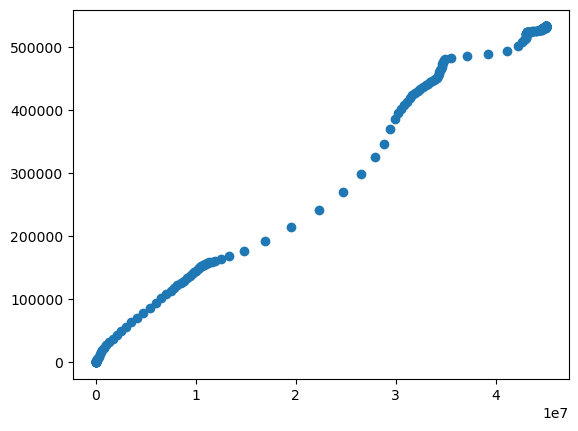

In [83]:
plt.scatter(x,y)
plt.show

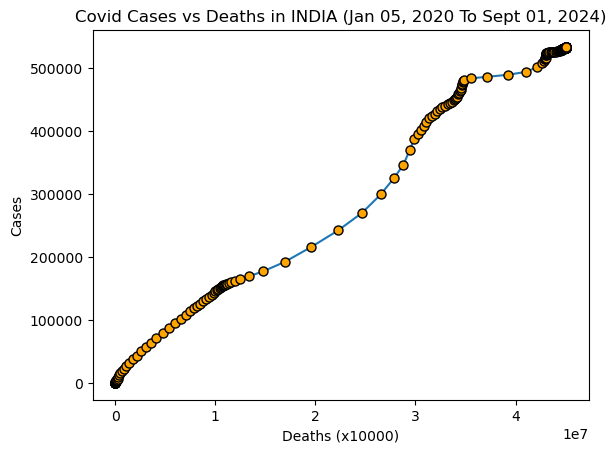

In [110]:
plt.plot(x,y,marker=all_poss[0], markerfacecolor='orange', markersize=13, markeredgecolor="black")
plt.xlabel("Deaths (x10000)")
plt.ylabel("Cases")
plt.title("Covid Cases vs Deaths in INDIA (Jan 05, 2020 To Sept 01, 2024)")
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 7)

In [114]:
X_train

165    44687820
37      5400619
156    44678649
116    43019453
178    44991582
         ...   
211    45023751
67     14788109
25       528859
196    44999328
175    44980674
Name: Cumulative_cases, Length: 146, dtype: int64

In [120]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [122]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [124]:
c = lr.intercept_
c

18253.701356598234

In [126]:
m = lr.coef_
m

array([0.01160513])

In [132]:
# Y_pred_train = m*X_train + c
# Y_pred_train.flatten()
#OR
Y_pred_train = lr.predict(X_train)
Y_pred_train.flatten()


array([536861.54963132,  80928.5733674 , 536755.11900713, 517499.93789903,
       540386.74636743, 536643.31520891, 529109.22002299, 132645.77955758,
       527588.29843488,  18253.78259249,  18717.67435358, 516844.24819594,
       421419.02171061, 536710.70618423, 536545.41435342, 449061.14721861,
       536448.94092861, 540509.72590342, 423146.52617313, 540835.0524423 ,
       536723.81997829, 418751.44389589, 397683.69274077, 150076.90154245,
       157185.92411873,  26065.86700227, 525984.9804416 , 105228.92117925,
       430560.71718185, 138064.63136647, 540467.32076758, 540799.52914706,
       517600.64719538, 540400.74215118,  34332.86080446, 376123.59405197,
       524500.12758973,  94260.0099901 , 533615.73473437, 140780.46330128,
       113231.0163414 , 537659.93598201, 130176.12719218, 540418.06860652,
       145813.21251863, 535778.40826746, 139530.57946566,  19784.04630823,
       518856.78619471, 540955.81539895, 540947.15797384, 536769.91554468,
       365037.71478287, 5

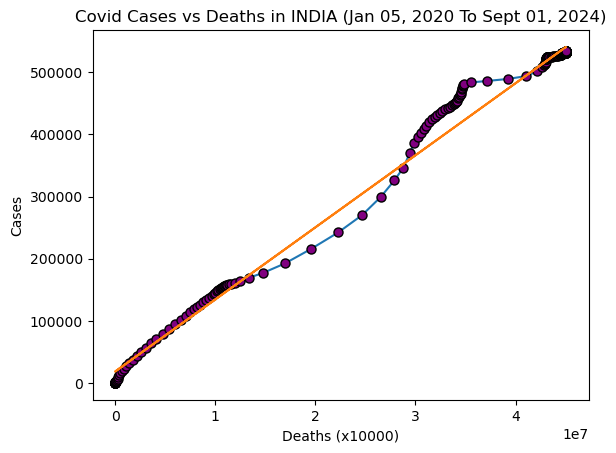

In [148]:
plt.plot(x,y,marker=all_poss[0], markerfacecolor='purple', markersize=13, markeredgecolor="black")
plt.plot(X_train, Y_pred_train, marker=all_poss[14], markerfacecolor="red", markersize=13, markeredgecolor="black")
plt.xlabel("Deaths (x10000)")
plt.ylabel("Cases")
plt.title("Covid Cases vs Deaths in INDIA (Jan 05, 2020 To Sept 01, 2024)")
plt.show()

In [150]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([379243.55134131, 521799.869736  ,  18253.7013566 , 540424.99686763,
       540365.41614311, 536176.93995053, 414864.36446932, 403972.40688054,
       517942.00041532, 134667.32313528, 415999.71730175, 385623.57462416,
        23017.15359058, 540408.7728994 , 382328.61201229,  21115.85073879,
       536840.62558646, 540977.88835143,  18257.87920249, 518193.17018955,
        18253.7013566 , 519326.1671811 , 536809.82557811, 540922.83362662,
       536801.42346581, 147032.6793151 , 391852.65001376, 540584.47452958,
       518460.15775254, 507852.42134109, 372737.34550728, 495137.65798285,
        18253.78259249, 419472.23836419, 520717.33183876, 163149.62505806,
        18253.78259249, 352589.75330559,  28112.87222968, 540694.8857125 ,
       420841.49254115, 540874.88123984, 143895.02420634, 537265.23399101,
       540787.78475804, 540775.44850752, 123811.68959555, 540975.56732593,
       536782.86686695, 173284.33647309, 540637.3010699 , 540463.1081063 ,
       369113.64444906, 4

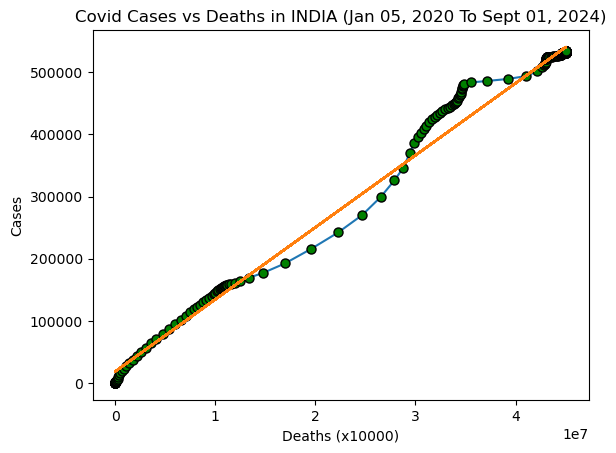

In [154]:
plt.plot(x,y,marker=all_poss[0], markerfacecolor='green', markersize=13, markeredgecolor="black")
plt.plot(X_test, y_pred_test, marker=all_poss[14], markerfacecolor="red", markersize=13, markeredgecolor="black")
plt.xlabel("Deaths (x10000)")
plt.ylabel("Cases")
plt.title("Covid Cases vs Deaths in INDIA (Jan 05, 2020 To Sept 01, 2024)")
plt.show()

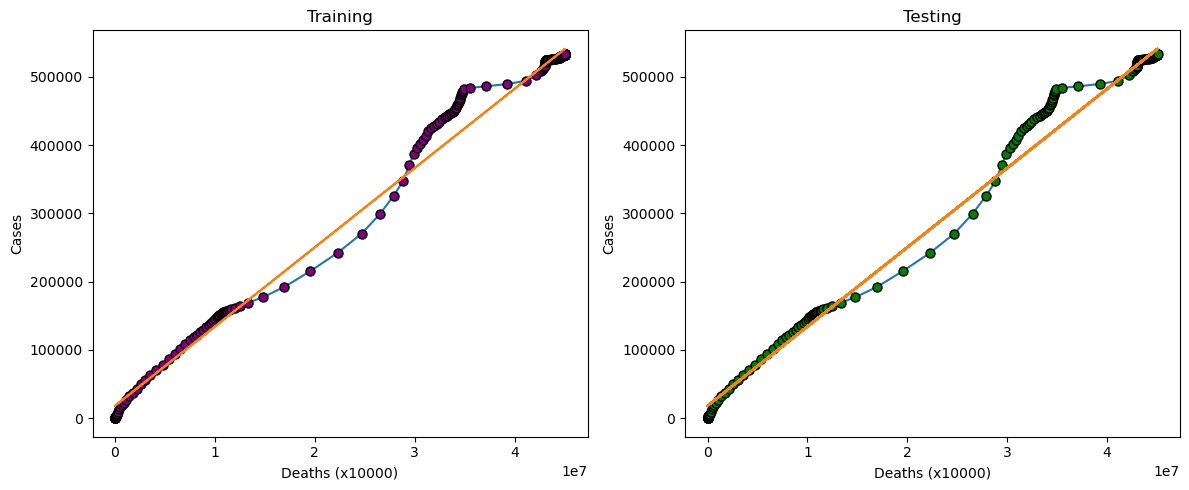

In [170]:
plt.figure(figsize=(12, 5))  # Adjust the figure size

# First graph
plt.subplot(1, 2, 1)  # (1 row, 2 columns, 1st subplot)
plt.plot(x,y,marker=all_poss[0], markerfacecolor='purple', markersize=13, markeredgecolor="black")
plt.plot(X_train, Y_pred_train, marker=all_poss[14], markerfacecolor="red", markersize=13, markeredgecolor="black")
plt.xlabel("Deaths (x10000)")
plt.ylabel("Cases")
plt.title("Training")
# plt.legend()

# Second graph
plt.subplot(1, 2, 2)  # (1 row, 2 columns, 2nd subplot)
plt.plot(x,y,marker=all_poss[0], markerfacecolor='green', markersize=13, markeredgecolor="black")
plt.plot(X_test, y_pred_test, marker=all_poss[14], markerfacecolor="red", markersize=13, markeredgecolor="black")
plt.xlabel("Deaths (x10000)")
plt.ylabel("Cases")
plt.title("Testing")
# plt.legend()

# Display the plots
plt.tight_layout()  # Adjust spacing between subplots
plt.show()
